In [94]:
import numpy as np


In [95]:
###############第一节课##########################
dimensions=[28*28, 10]    #第一个参数是图片的维度，第二个参数是output的维度

In [96]:
#定义激活函数
def tanh(x):
    return np.tanh(x)

    
def softmax(x):
    exp = np.exp(x-x.max())   # x-x.max()的作用是防止指数爆炸，在经过相减运算后，不影响最后的结果
    return exp/exp.sum()      #因为在代码中使用了x.max()，而普通数组是没有这样的max函数的，而np.array()有
                              #所以在传参进softmax(x)时，要传进来np.array(x)

In [97]:
#定义初始化参数的函数
def init_parematers(input_dim, output_dim):  #参数为输入图片的维度和输出图片的维度
    b0 = np.zeros(input_dim)   #b0为全零，大小为784*1
    b1 = np.zeros(output_dim)  #b1为全零，大小为10*1
    w1 = np.random.rand(input_dim, output_dim)  #w1为随机，大小为784*10
    
    init_parameters_b_w = [   #以字典的形式返回所有参数
        {'b0':b0},
        {'b1':b1, 'w1':w1}
    ]
    return init_parameters_b_w

In [98]:
#预测手写函数
def predect(flatten_img):    
    parematers = init_parematers(dimensions[0], dimensions[1])   #获取初始化的参数
    layer_0 = tanh(flatten_img + parematers[0]['b0'])           # l0 = tanh(data + b0)
    layer_1 = softmax(np.dot(layer_0, parematers[1]['w1']) + parematers[1]['b1'])  #l1 = softmax(l0 * w1 + b1)
    return layer_1   

In [99]:
predect(np.random.rand(784)).argmax()   #argxmax()函数用于返回其中最大值的位置，本例中最大值的位置就是预测的手写数字

0

In [100]:
##########################第二节课##################################
#设置训练集，验证集和测试集
train_set_num = 50000
valid_set_num = 10000
test_set_num = 10000

In [161]:
#读取MNIST文件
import os

root_path = os.path.abspath('.')  #获取当前文件夹的绝对路径

train_img_path = os.path.join(root_path,"MNIST\\train-images.idx3-ubyte") #join()函数能将两个参数地址拼接到一起
train_lab_path = os.path.join(root_path,"MNIST\\train-labels.idx1-ubyte")

test_img_path = os.path.join(root_path,"MNIST\\t10k-images.idx3-ubyte")
test_lab_path = os.path.join(root_path,"MNIST\\t10k-labels.idx1-ubyte")

# 读取训练集中的图片数据
with open(train_img_path, 'rb') as t:  
    t.seek(16)    #因为train-images.idx3-ubyte中，前16个字节的数据是描述这个文件的，所以真正的数据是从16后面开始的
    train_img = np.fromfile(t,dtype=np.uint8).reshape(-1,28*28)  #np.fromfile()作用：从文本或二进制文件中的数据构造一个数组
    #reshape(-1,28*28)的解释：-1代表自动检测，因为不知道源文件中有多少个手写体数字，但是知道每个图片都是28*28的，所以第一个参数为-1就代表自动检测文件中有多少个28*28的图片
    train_img = train_img[:train_set_num]   #从60000训练集中分离出前50000个为真正的训练集
    valid_img = train_img[valid_set_num:]   #从60000训练集中分离出后10000个为验证集

# 读取训练集中的标签数据
with open(train_lab_path, 'rb') as t:  
    t.seek(8)    #在train-labels.idx1-ubyte中，前8个字节的数据是描述这个文件的
    train_lab = np.fromfile(t,dtype=np.uint8)
    train_lab = train_lab[:train_set_num]   
    valid_lab = train_lab[valid_set_num:]

# 读取测试集中的图片数据
with open(test_img_path, 'rb') as t:  
    t.seek(16) 
    test_img = np.fromfile(t,dtype=np.uint8).reshape(-1,28*28)


# 读取测试集中的标签数据
with open(test_lab_path, 'rb') as t:  
    t.seek(8)    
    test_lab = np.fromfile(t,dtype=np.uint8)
    

In [160]:
#把数据画出来
import matplotlib.pyplot as plt

#画出训练集数据
def show_train_img(index):
    img = train_img[index].reshape(28,28)  #前面读取图片时的28*28是告诉程序每一张图片有多大，最后仍然是按行来储存读出来的数据（即:1*784的一维数据），而此处的28*28则是将读出来的那个一维数据转换成二维交给画图程序画图
    plt.imshow(img, cmap="gray")     #用灰度的格式将图片画出来
    print("train_data:{}".format(train_lab[index]))     #打印图片对应的标签

#画出验证集数据
def show_valid_img(index):
    img = valid_img[index].reshape(28,28)
    plt.imshow(img,cmap="gray")
    print("valid_data:{}".format(valid_lab[index]))

#画出测试集数据
def show_test_img(index):
    img = test_img[index].reshape(28,28)
    plt.imshow(img,cmap="gray")
    print("test_data:{}".format(test_lab[index]))

train_data:3


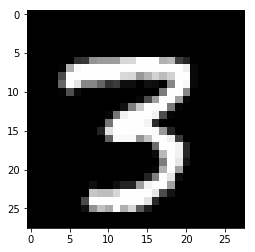

In [156]:
#显示训练集图片和标签
show_train_img(np.random.randint(60000))

valid_data:8


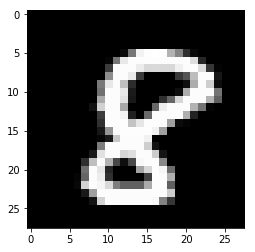

In [162]:
#显示验证集的图片和标签
show_valid_img(np.random.randint(10000))

test_data:0


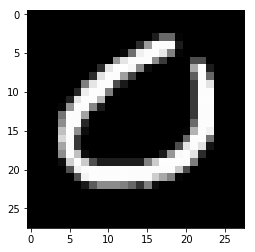

In [135]:
#显示测试集图片和标签
show_test_img(np.random.randint(10000))